In [1]:
import sys
import datetime
import pandas as pd

path_root = '../../..'
sys.path.append(f'{path_root}/')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "friuli venezia giulia"

path_data = f'{path_root}/data'
path_img_root =  f'{path_data}/imgs/grafici/{level}/{region_name}'
path_csv = f'{path_data}/csv'
csv_in_name = f'{path_csv}/{level}/covid19-{region_name}.csv'

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,31.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
1,2020-02-26T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,2020-02-27T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,27.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,2020-02-28T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,28.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
4,2020-02-29T17:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,20.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,2021-02-28T17:00:00,6,Friuli Venezia Giulia,361,61,422,9660,10082,97,341,...,7.0,4337.0,1841.0,92.0,14.45,4.19,7.86,18.52,-1.61,0.97
370,2021-03-01T17:00:00,6,Friuli Venezia Giulia,373,62,435,9727,10162,80,172,...,3.0,2047.0,917.0,67.0,14.25,4.28,8.40,18.76,1.64,0.79
371,2021-03-02T17:00:00,6,Friuli Venezia Giulia,380,61,441,9765,10206,44,479,...,12.0,9579.0,3172.0,38.0,13.83,4.32,5.00,15.10,-1.61,0.43
372,2021-03-03T17:00:00,6,Friuli Venezia Giulia,386,62,448,10107,10555,349,693,...,10.0,8845.0,3489.0,342.0,13.84,4.24,7.83,19.86,1.64,3.42


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 4, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 643
Nuovi tamponi: 9108.0
Percentuale nuovi positivi/nuovi tamponi: 7.1 %
Nuovi guariti: 248.0
Nuovi deceduti: 10.0
Variazione positivi ricoverati con sintomi: 6.0
Variazione positivi in terapia intensiva: 1.0
Variazione positivi in isolamento dimiciliare: 378.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2021, 3, 4, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-01-03T17:00:00,6,Friuli Venezia Giulia,658,61,719,10930,11649,-198,200,...,20.0,2211.0,659.0,-202.0,8.48,6.17,9.05,30.35,-3.17,-1.67
1,2021-01-04T17:00:00,6,Friuli Venezia Giulia,663,63,726,10967,11693,44,281,...,24.0,2438.0,723.0,37.0,8.68,6.21,11.53,38.87,3.28,0.38
2,2021-01-05T17:00:00,6,Friuli Venezia Giulia,657,59,716,11078,11794,101,688,...,41.0,7105.0,1680.0,111.0,8.24,6.07,9.68,40.95,-6.35,0.86
3,2021-01-06T17:00:00,6,Friuli Venezia Giulia,649,62,711,11119,11830,36,606,...,33.0,6380.0,1403.0,41.0,8.72,6.01,9.50,43.19,5.08,0.31
4,2021-01-07T17:00:00,6,Friuli Venezia Giulia,661,64,725,11640,12365,535,671,...,29.0,6145.0,1792.0,521.0,8.83,5.86,10.92,37.44,3.23,4.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2021-02-28T17:00:00,6,Friuli Venezia Giulia,361,61,422,9660,10082,97,341,...,7.0,4337.0,1841.0,92.0,14.45,4.19,7.86,18.52,-1.61,0.97
57,2021-03-01T17:00:00,6,Friuli Venezia Giulia,373,62,435,9727,10162,80,172,...,3.0,2047.0,917.0,67.0,14.25,4.28,8.40,18.76,1.64,0.79
58,2021-03-02T17:00:00,6,Friuli Venezia Giulia,380,61,441,9765,10206,44,479,...,12.0,9579.0,3172.0,38.0,13.83,4.32,5.00,15.10,-1.61,0.43
59,2021-03-03T17:00:00,6,Friuli Venezia Giulia,386,62,448,10107,10555,349,693,...,10.0,8845.0,3489.0,342.0,13.84,4.24,7.83,19.86,1.64,3.42


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

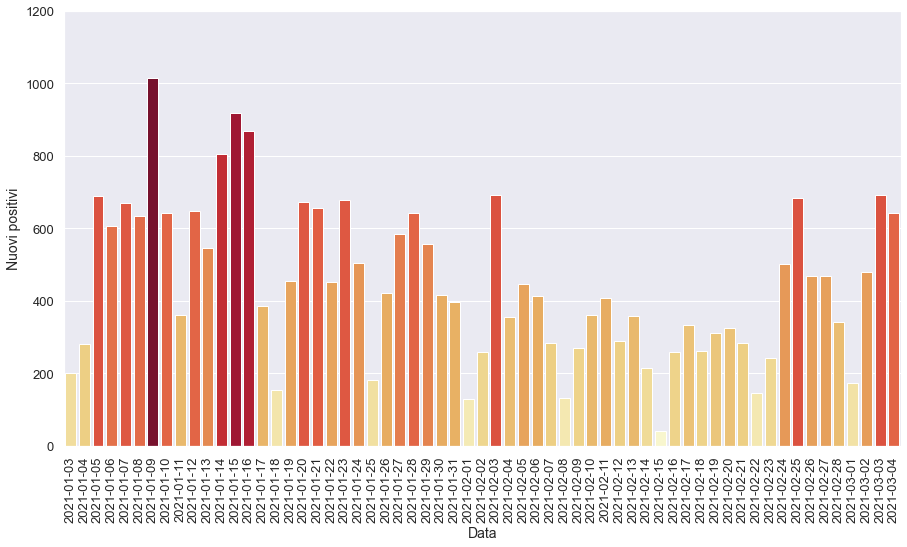

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

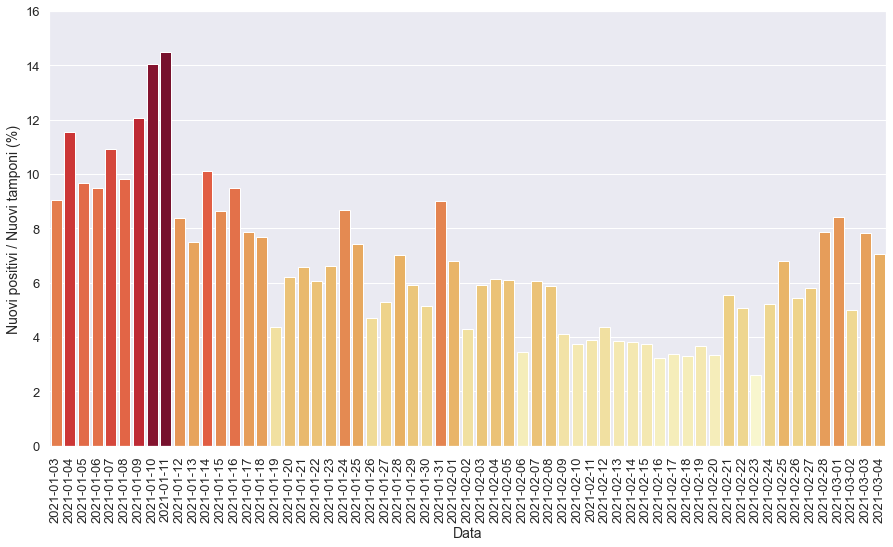

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

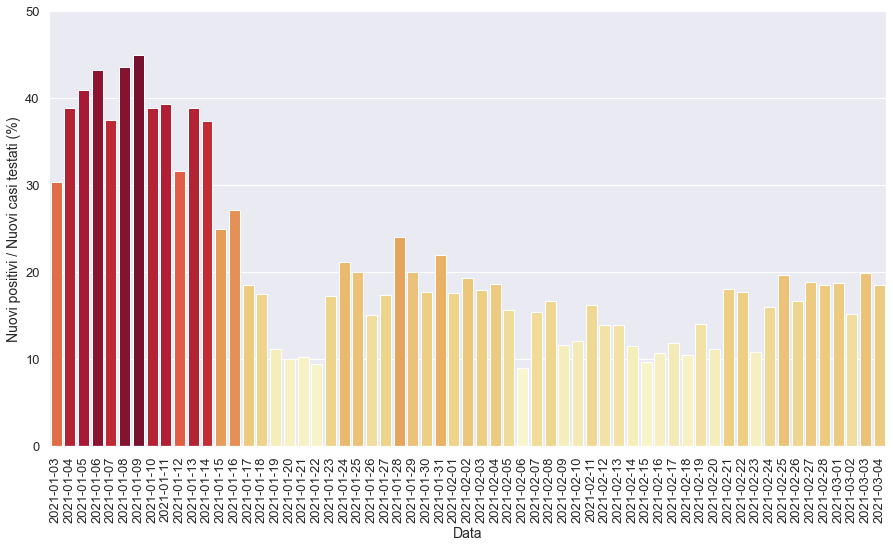

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

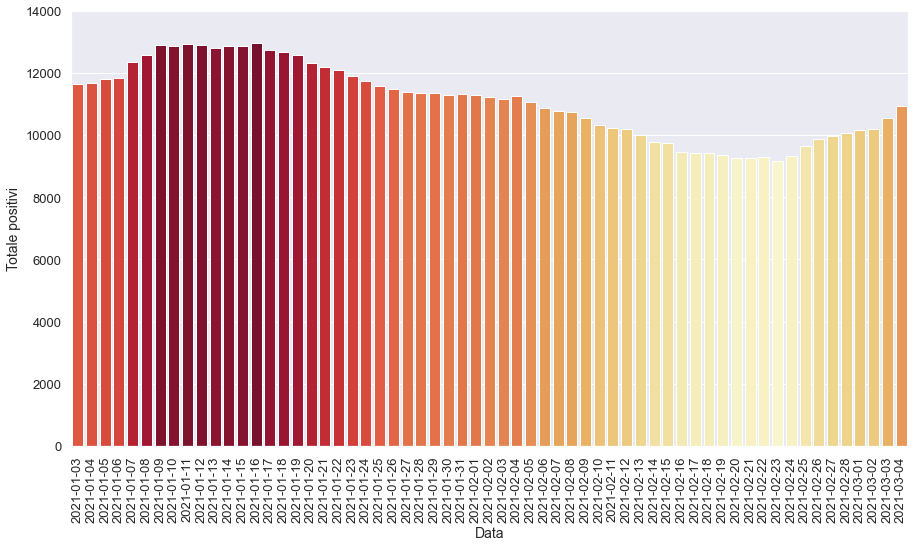

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

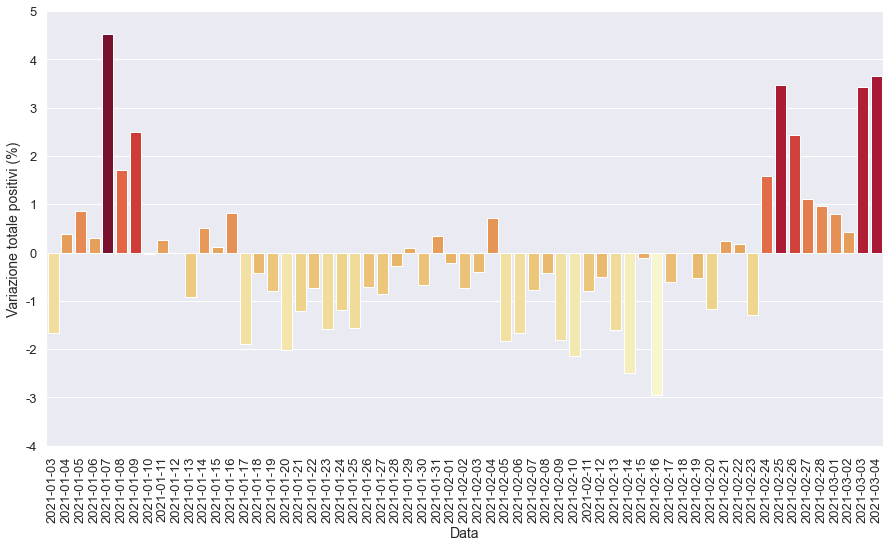

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

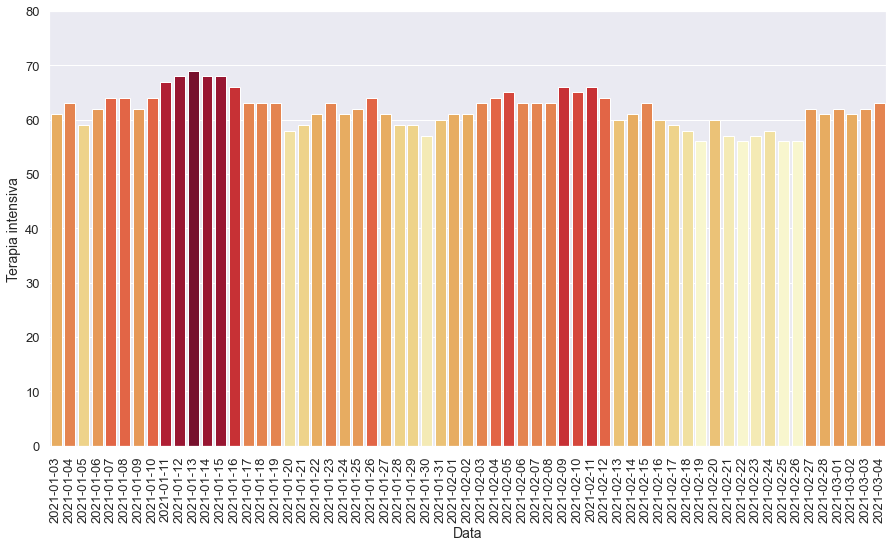

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

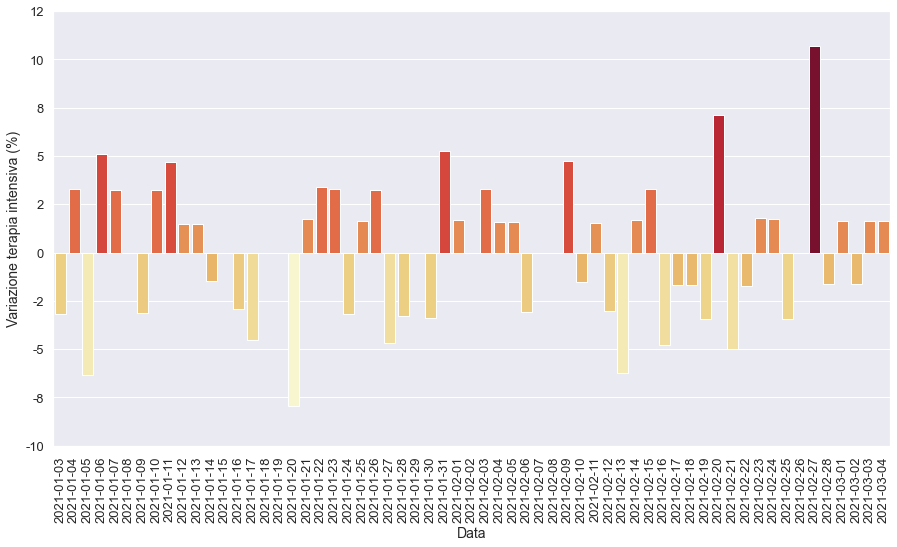

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

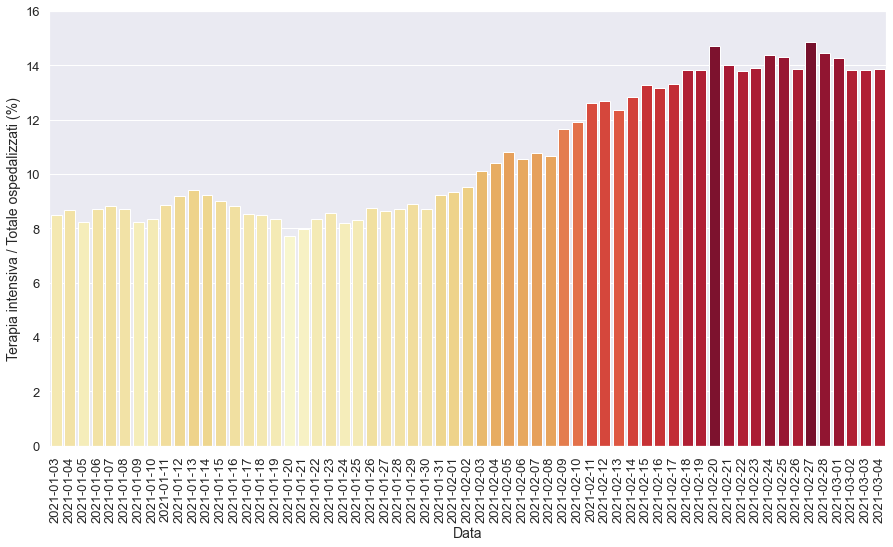

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

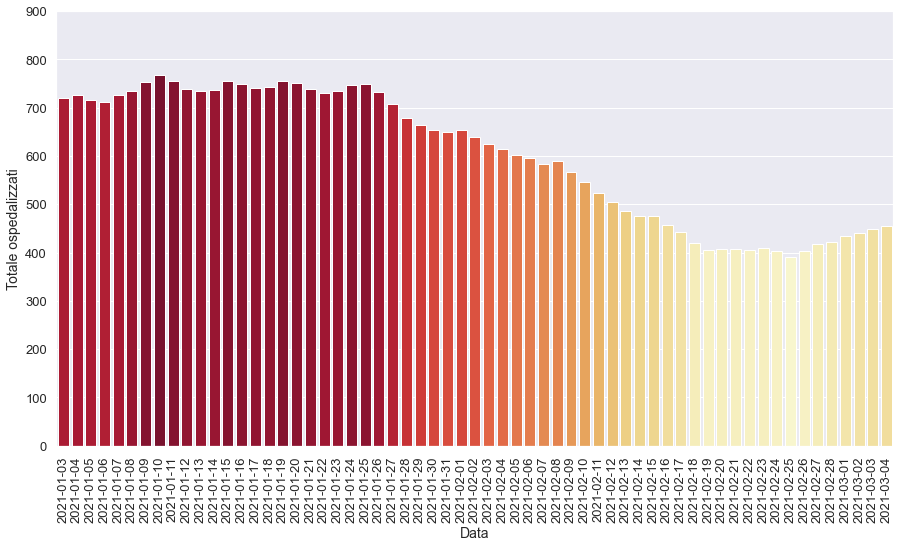

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

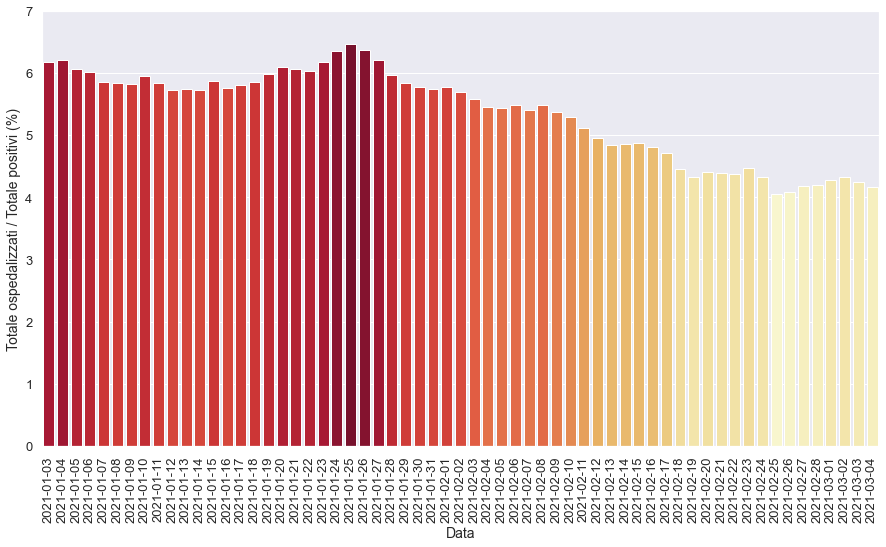

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

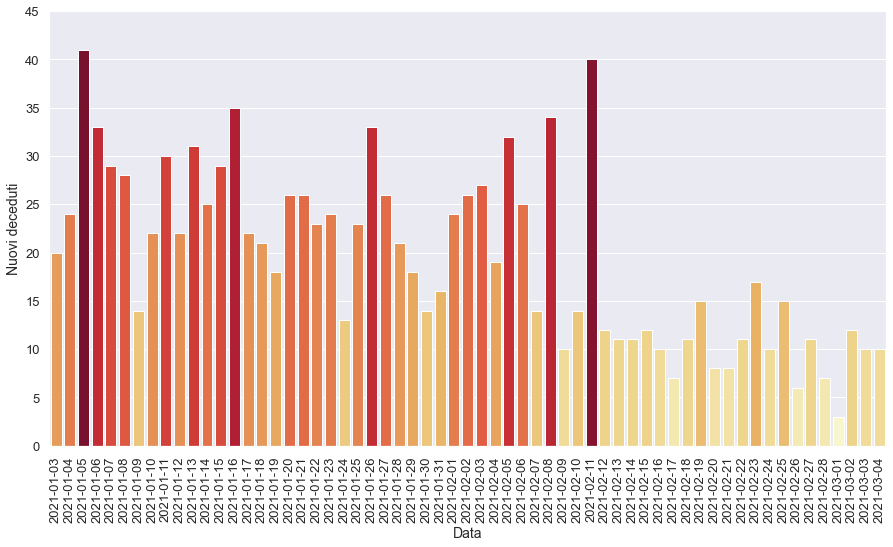

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

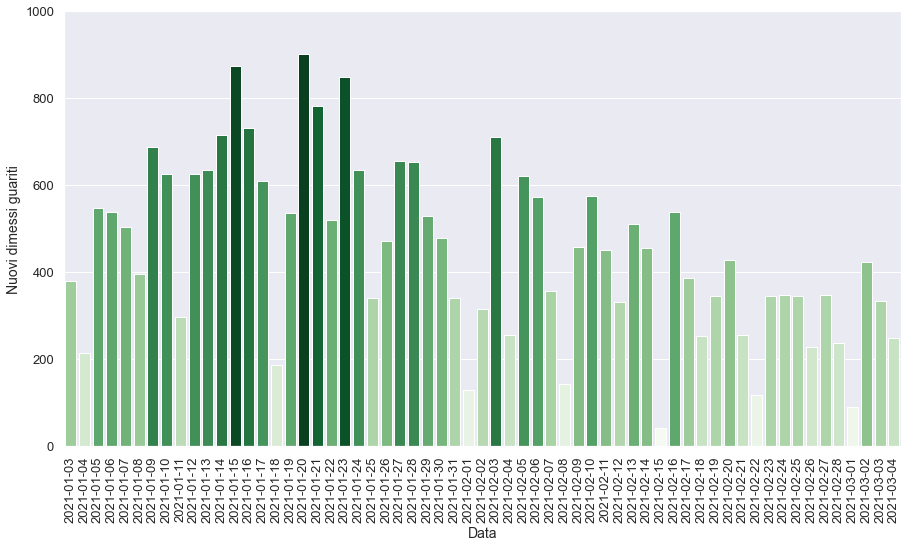

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-02T17:00:00,6,Friuli Venezia Giulia,579,61,640,10586,11226,-83,258,...,26.0,5991.0,1338.0,-69.0,9.53,5.70,4.31,19.28,0.00,-0.73
1,2021-02-03T17:00:00,6,Friuli Venezia Giulia,561,63,624,10556,11180,-46,692,...,27.0,11697.0,3850.0,-30.0,10.10,5.58,5.92,17.97,3.28,-0.41
2,2021-02-04T17:00:00,6,Friuli Venezia Giulia,550,64,614,10647,11261,81,355,...,19.0,5783.0,1912.0,91.0,10.42,5.45,6.14,18.57,1.59,0.72
3,2021-02-05T17:00:00,6,Friuli Venezia Giulia,536,65,601,10454,11055,-206,446,...,32.0,7302.0,2855.0,-193.0,10.82,5.44,6.11,15.62,1.56,-1.83
4,2021-02-06T17:00:00,6,Friuli Venezia Giulia,533,63,596,10276,10872,-183,413,...,25.0,11942.0,4614.0,-178.0,10.57,5.48,3.46,8.95,-3.08,-1.66
5,2021-02-07T17:00:00,6,Friuli Venezia Giulia,521,63,584,10203,10787,-85,285,...,14.0,4696.0,1852.0,-73.0,10.79,5.41,6.07,15.39,0.00,-0.78
6,2021-02-08T17:00:00,6,Friuli Venezia Giulia,527,63,590,10152,10742,-45,132,...,34.0,2242.0,793.0,-51.0,10.68,5.49,5.89,16.65,0.00,-0.42
7,2021-02-09T17:00:00,6,Friuli Venezia Giulia,501,66,567,9979,10546,-196,271,...,10.0,6579.0,2335.0,-173.0,11.64,5.38,4.12,11.61,4.76,-1.82
8,2021-02-10T17:00:00,6,Friuli Venezia Giulia,481,65,546,9773,10319,-227,361,...,14.0,9634.0,2992.0,-206.0,11.90,5.29,3.75,12.07,-1.52,-2.15
9,2021-02-11T17:00:00,6,Friuli Venezia Giulia,457,66,523,9714,10237,-82,409,...,40.0,10473.0,2528.0,-59.0,12.62,5.11,3.91,16.18,1.54,-0.79


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

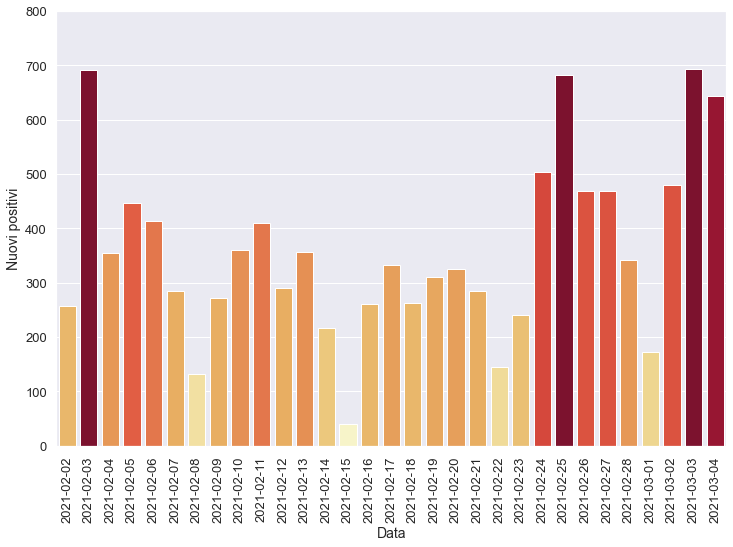

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

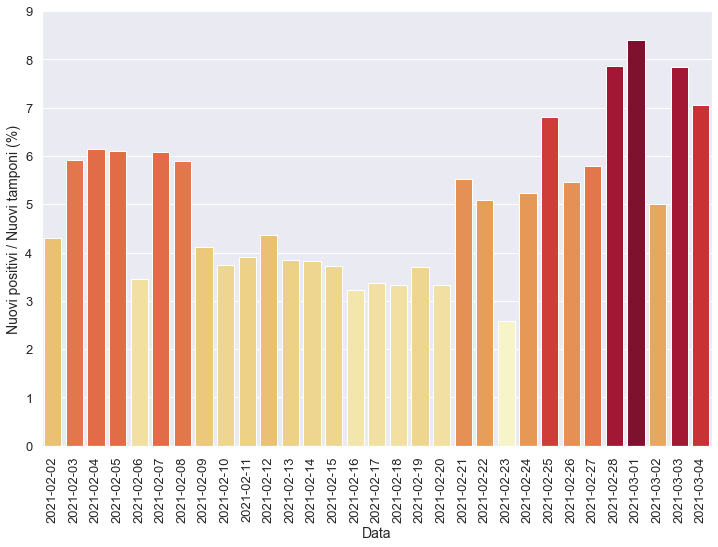

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

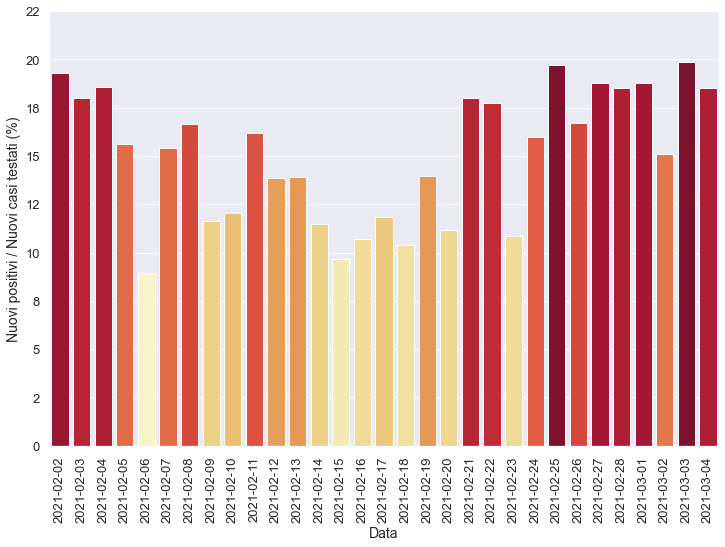

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

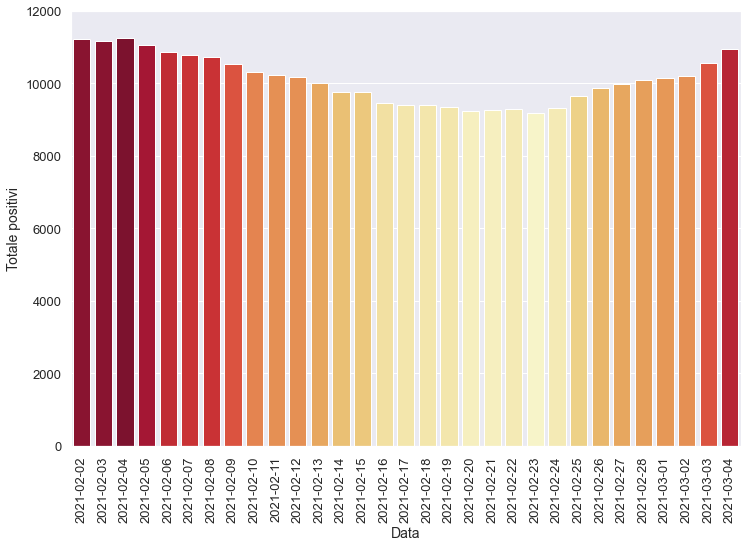

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

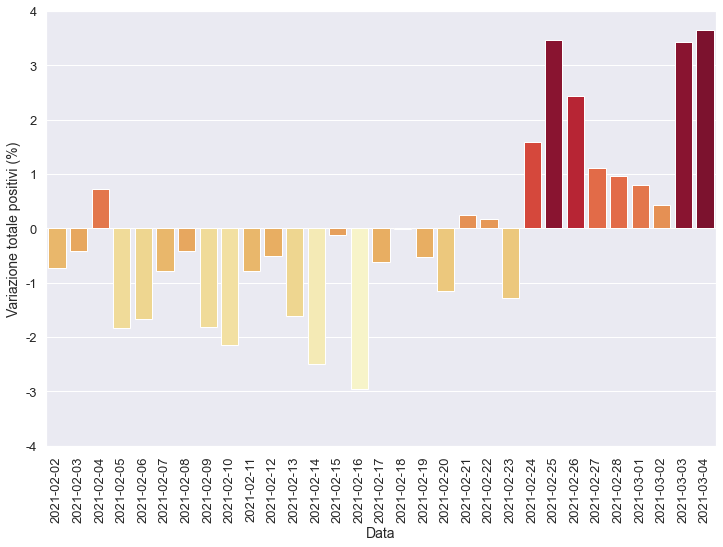

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

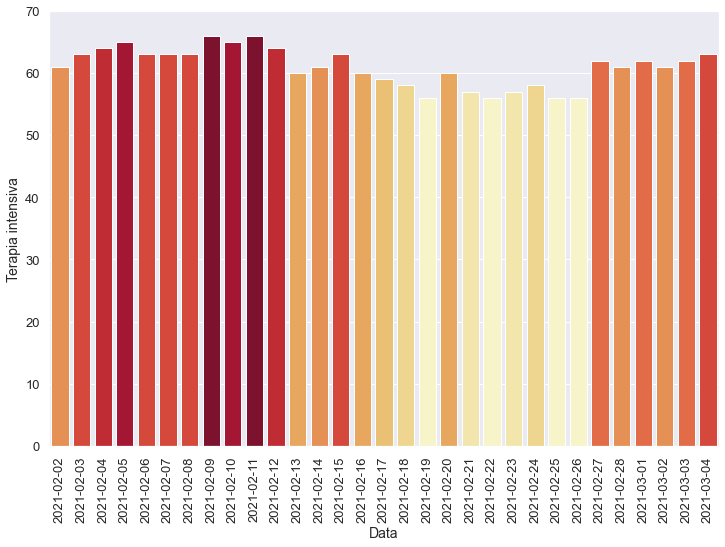

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

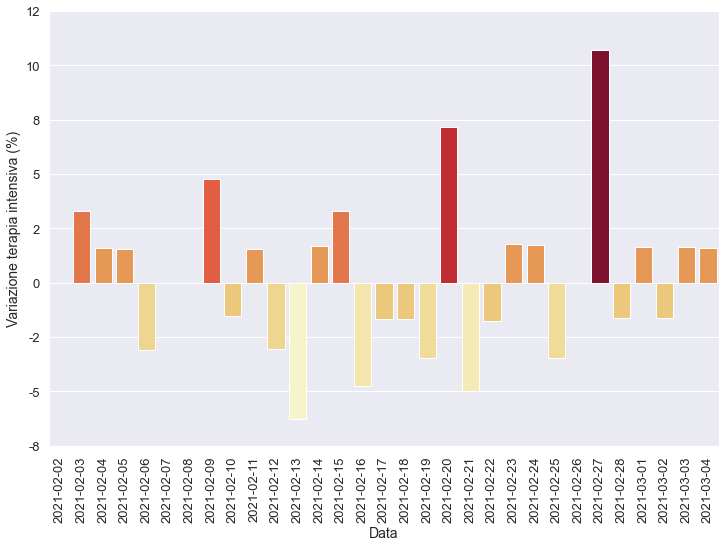

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

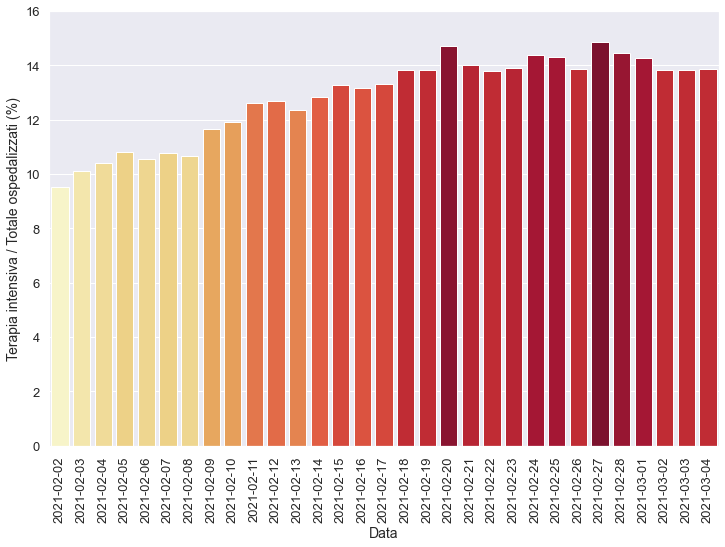

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

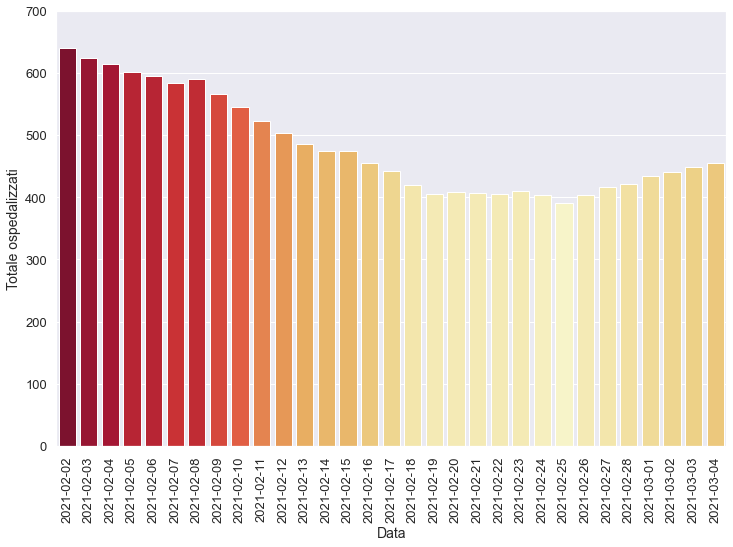

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

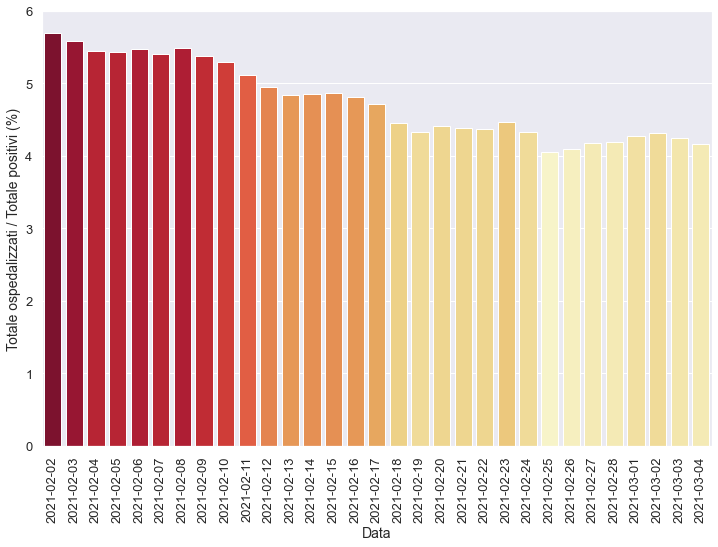

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

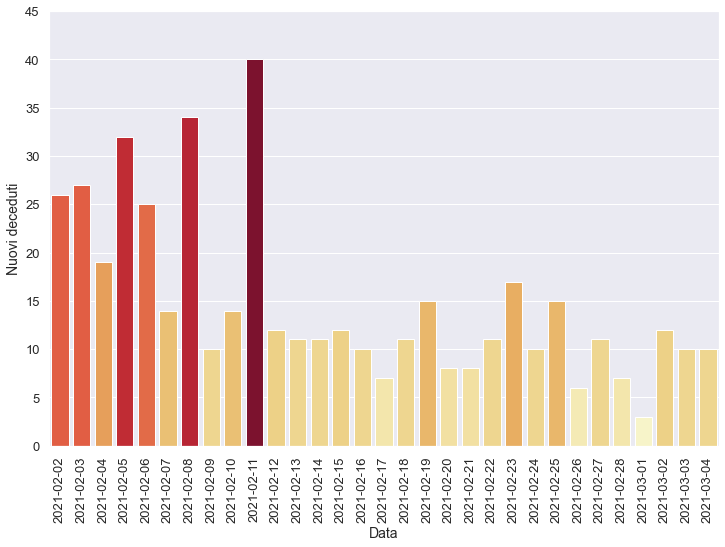

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

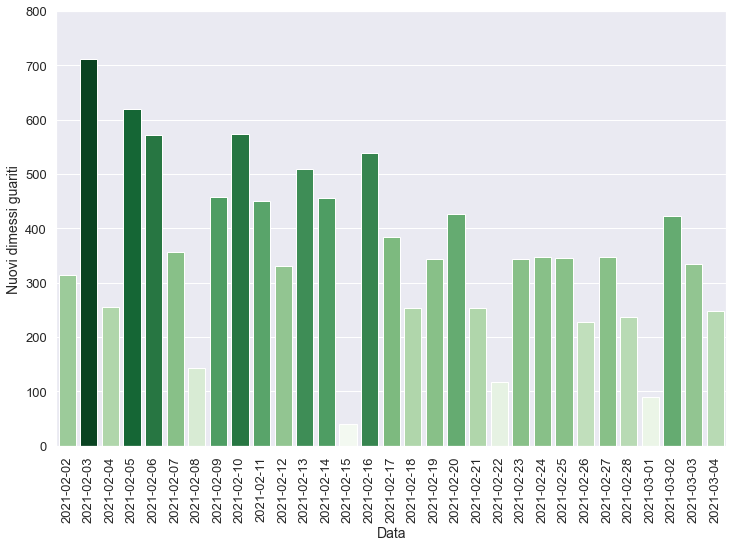

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2021-02-25T17:00:00,6,Friuli Venezia Giulia,335,56,391,9249,9640,323,683,...,15.0,10042.0,3469.0,335.0,14.32,4.06,6.80,19.69,-3.45,3.47
1,2021-02-26T17:00:00,6,Friuli Venezia Giulia,348,56,404,9471,9875,235,468,...,6.0,8591.0,2806.0,222.0,13.86,4.09,5.45,16.68,0.00,2.44
2,2021-02-27T17:00:00,6,Friuli Venezia Giulia,355,62,417,9568,9985,110,468,...,11.0,8079.0,2491.0,97.0,14.87,4.18,5.79,18.79,10.71,1.11
3,2021-02-28T17:00:00,6,Friuli Venezia Giulia,361,61,422,9660,10082,97,341,...,7.0,4337.0,1841.0,92.0,14.45,4.19,7.86,18.52,-1.61,0.97
4,2021-03-01T17:00:00,6,Friuli Venezia Giulia,373,62,435,9727,10162,80,172,...,3.0,2047.0,917.0,67.0,14.25,4.28,8.40,18.76,1.64,0.79
5,2021-03-02T17:00:00,6,Friuli Venezia Giulia,380,61,441,9765,10206,44,479,...,12.0,9579.0,3172.0,38.0,13.83,4.32,5.00,15.10,-1.61,0.43
6,2021-03-03T17:00:00,6,Friuli Venezia Giulia,386,62,448,10107,10555,349,693,...,10.0,8845.0,3489.0,342.0,13.84,4.24,7.83,19.86,1.64,3.42
7,2021-03-04T17:00:00,6,Friuli Venezia Giulia,392,63,455,10485,10940,385,643,...,10.0,9108.0,3476.0,378.0,13.85,4.16,7.06,18.50,1.61,3.65


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

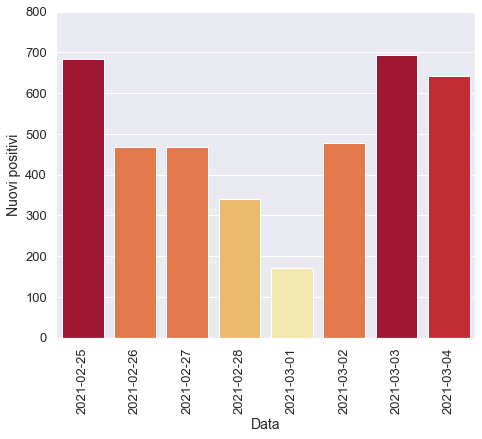

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

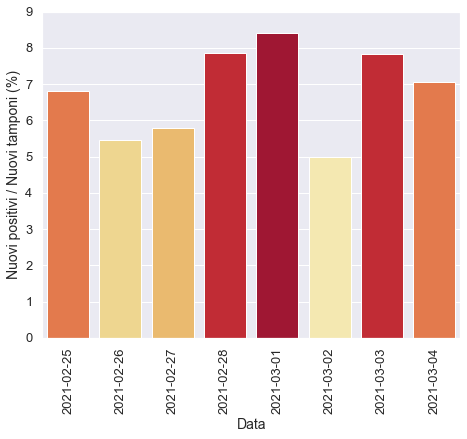

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

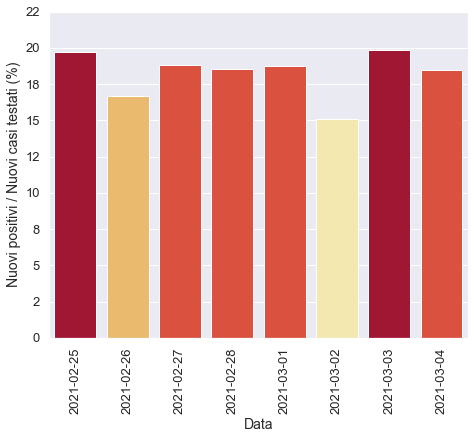

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

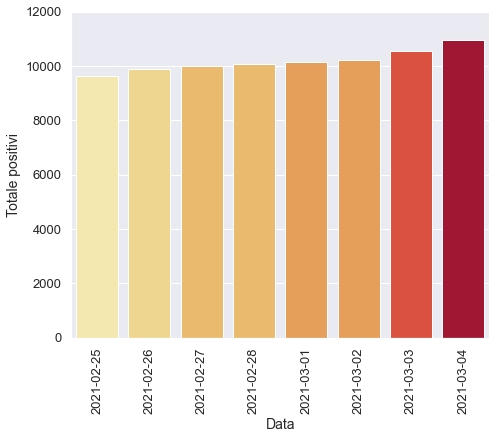

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

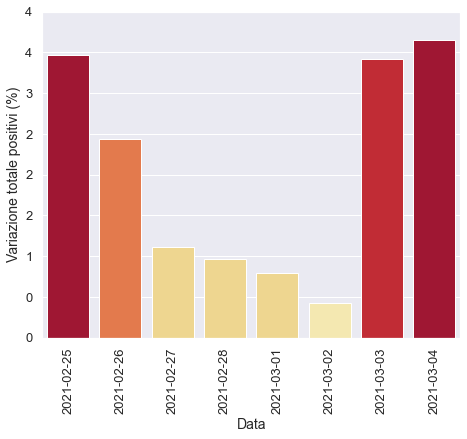

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

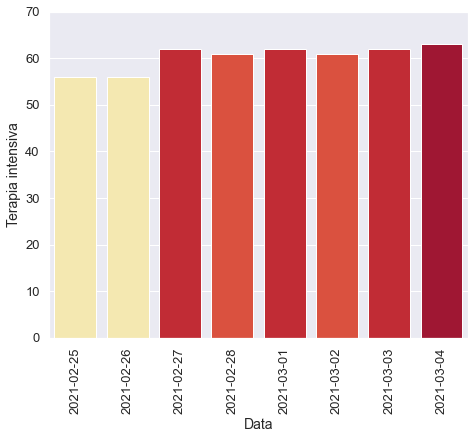

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

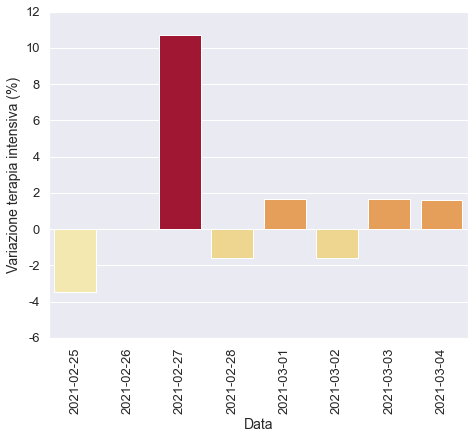

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

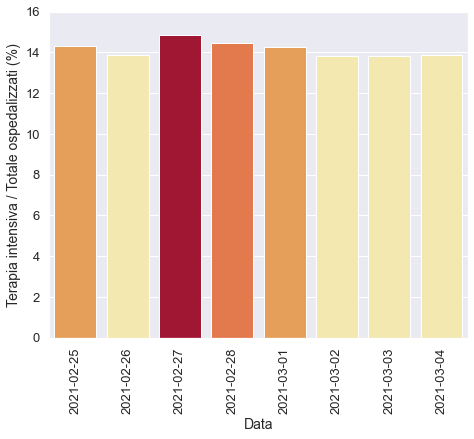

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

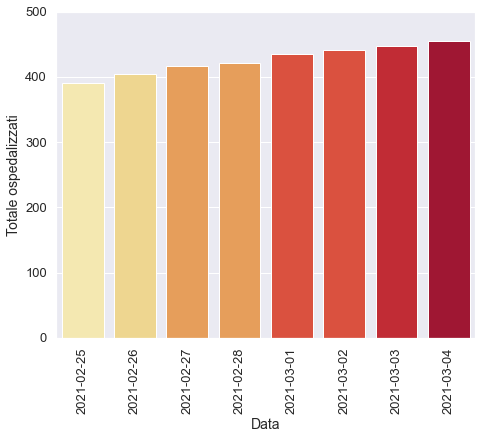

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

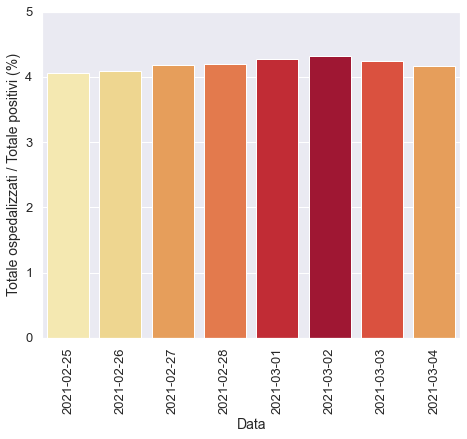

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

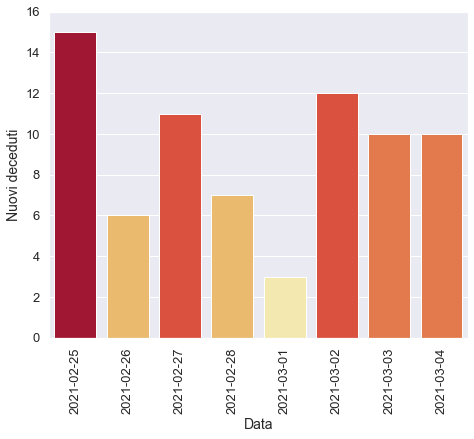

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

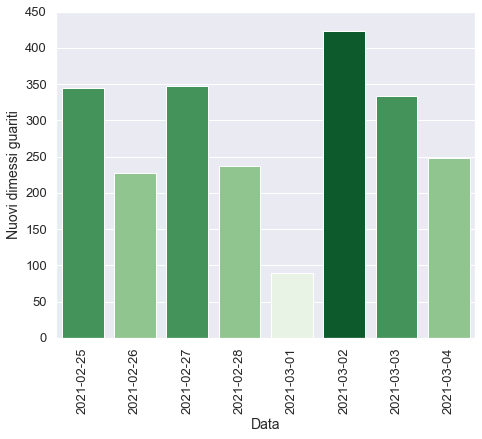

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)